# Basics


In [1]:
import torch
x = torch.tensor([[1,2],[2,3],[3,4]])
print(x)

tensor([[1, 2],
        [2, 3],
        [3, 4]])


In [2]:
x = x.view([1,6])
print(x)

tensor([[1, 2, 2, 3, 3, 4]])


In [3]:
y = x.size()
print(y)

torch.Size([1, 6])


# Data

In [4]:
import torchvision
from torchvision import datasets, transforms

In [5]:
dataset = datasets.MNIST(root = 'data/', download = True)
print(len(dataset))

60000


9


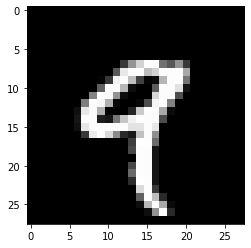

In [6]:
import matplotlib.pyplot as plt
image,label = dataset[4]
print(label)
plt.imshow(image,cmap = 'gray')

In [7]:
train = datasets.MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())
test = datasets.MNIST(root='data/', 
                train=False,
                transform=transforms.ToTensor())

7


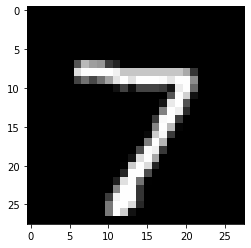

In [8]:
img, label = test[0]
print(label)
img = img.view([28,28])
plt.imshow(img, cmap = 'gray')

In [9]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

Label =  3


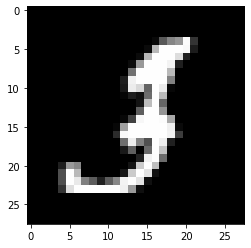

In [11]:
for data in trainset:
    print("Label = %2d" % (data[1][0]))
    plt.imshow(data[0][0].view([28,28]),cmap = 'gray')
    break

# Building the Neural Network

In [12]:
import torch.nn as nn
import torch.nn.functional as F

In [13]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim = 1)

In [14]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [17]:
x = torch.rand((28,28))
print(net.forward(x.view((1,784))))

tensor([[-2.2722, -2.3380, -2.4112, -2.3210, -2.1478, -2.3041, -2.4042, -2.3844,
         -2.2635, -2.2122]], grad_fn=<LogSoftmaxBackward>)


# Training the Neural Network

In [18]:
import torch.optim as optim

In [21]:
optimizer = optim.Adam(net.parameters(), lr = 0.001)

In [84]:
epochs = 5
for epoch in range(epochs):
    for data in trainset:
        x, y = data
        net.zero_grad()
        output = net(x.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print("Loss: %.2f" % (loss))

Loss: 0.09
Loss: 0.01
Loss: 0.03
Loss: 0.05
Loss: 0.02


# Testing the Neural Network

In [80]:
def test_accuracy():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testset:
            img, label = data
            output = net(img.view((-1, 784)))
            for index, i in enumerate(output):
                if torch.argmax(i) == label[index]:
                    correct += 1
                total += 1
        accuracy = 100*correct/total
        print("Correct Predictions: %2d" %(correct))
        print("Total Predictions: %2d" %(total))
        print("Accuracy: %.2f" %(accuracy))

In [81]:
def test_the_neuralnet(loc):
    img,label = test[int(loc)]
    print("Actual Number: %2d" % (label))
    plt.imshow(img.view([28, 28]),cmap = 'gray')
    output = net(img.view([-1, 28*28]))
    print("Prediction: %2d" %(torch.argmax(output)))

Enter a seed: 475
Actual Number:  4
Prediction:  4


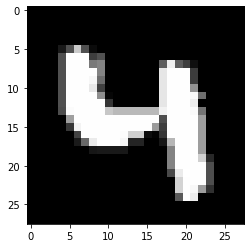

In [86]:
loc = input("Enter a seed: ")
test_the_neuralnet(loc)

In [85]:
test_accuracy()

Correct Predictions: 9728
Total Predictions: 10000
Accuracy: 97.28


# Convolutional Neural Networks